<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/Modelo_R_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión logística

>   La regresión logística es un modelo de clasificación que funciona muy bien en clases separables lineales. Este modelo también puede utilizarce para la clasificacion multiclase mediante la tecnica OvR.



## La regresión logística es un modelo basado en probabilidad condicional. La probabilidad de que ocurra un evento concreto se puede calcular como $$p/1-p$$
## donde p significa la probabilidad del evento positivo y 1 significa certeza.
## El evento positivo es el evento que queremos predecir, podemos penasr el evento positivo como una etiqueta de clase y=1.
## También podemos definir la función logit que es el logaritmo de la razon de probabilidades: $$logit(p)= log(p/1-p)$$
## la función logit toma como entrada valores del rango del 0 al 1, y los transforma en valores de todo el rango de números reales.
## Ahora, lo que realmente nos interesa es predecir la probabilidad de que una determinada muestra pertenesca a una clase concreta, que es la inversa a la función logit, la función sigmoide logística llamada abreviadamente función sigmoide. $$\phi(Z)=\frac {1}{1+e^{-z}}$$

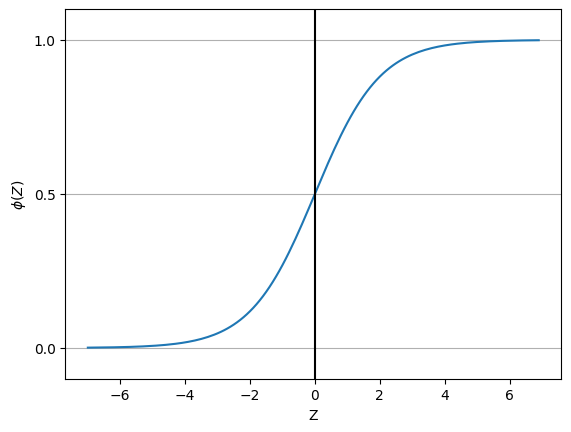

In [1]:
#Vamos a mostrar gráficamente la funcion sigmoide para el rango 7, -7
import matplotlib.pyplot as plt
import numpy as np
def sigmoide(z):
  return 1.0 / (1.0+np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('Z')
plt.ylabel('$\phi (Z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

## Podemos ver que $\phi (Z)$ se aproxima a 1 si Z se dirige al infinito postivo ya que e$^{-z}$ pasa a ser muy pequeño para los valores de Z. De igual manera, $\phi (Z)$ se dirige a 0 cuando Z se aproxima al infinito negativo. La función sigmoide toma valores de números reales y devuelve un número del rango[0,1] y consta de una interseccion en $\phi(Z)=0.5$.     

## La salida de la función sigmoide se interpreta como la probabilidad de que una muestra pertenesca a una clase en concreta dada sus caracteristicas. $\phi(Z)=P(y=1|x;w)$ Donde $x$ son las caracteristicas parametrizadas por los pesos $w$.

# Creando un diagrama que ilustra el coste de clasificación.

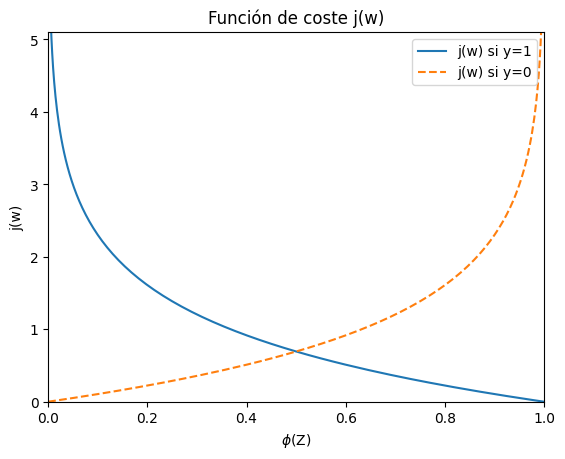

In [2]:
def cost_1(z):
  return -np.log(sigmoide(z))

def cost_0(z):
  return -np.log(1-sigmoide(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoide(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='j(w) si y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='j(w) si y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.title('Función de coste j(w)')
plt.xlabel('$\phi $(Z)')
plt.ylabel('j(w)')
plt.legend(loc='best')
plt.show()

## Podemos concluir con el diagrama anterior que si la clasificaion de una etiqueta es erronea el coste tiende a infinito, penalizamos las predicciones erroneas con un coste cada ves mayor. En caso contrario, si la clasificación $(y=0 | y=1)$es correcta, el coste se aproxima a cero.

# Convirtiendo el algoritmo adaline en uno de Regresión logística.

## Para lograr esto vamos a cambiar la función de activación lineal por la activación sigmoide y cambiar la función de umbral para retornar números del rango[0,1] en lugar de las etiquetas -1 y 1.

In [3]:
class RegresionLogisticaSG(object):
  """ Clasificador Regrsión logística usando gradiente descendiente
  parametros
  ------------
  eta : float
    tasa de aprendizage (enter 0.0 y 1.0)
  n_iter: int
    pasos por el conjunto de datos de entrenamiento
  random_state: int
    generador de numero de la semilla aleatoria para inicializar los pesos.

  Atributos
  -----------
  w_ : 1d-array
    pesos despues del ajuste.
  cost_ : list
    suma de errores cuadraticos valor de la función de coste en cada epoca.
  """
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state= random_state
  def fit(self, X, y):
    """ Ajustar los datos de entrenamiento.
    parametros
    -----------
    X: {Array-like} shape=[n_samples, n_features]
    Vectores de entrenamiento donde n_samples es el numero de muestras y
    n_features es el numero de caracteristicas.
    y : array-like
    valores objetivos
    retorna
    --------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ =rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input= self.net_input(X)
      output = self.activation(net_input)
      errors= (y-output)
      self.w_[1:]+= self.eta * X.T.dot(errors)
      self.w_[0] += self.eta* errors.sum()
      # Ahora calculamos el coste logistico en lugar de la suma de cuadrados.
      cost = (-y.dot(np.log(output)) -((1-y).dot(np.log(1-output))))
      self.cost_.append(cost)
    return self

    def net_input(self, X):
      """"Calcual la siguiente entrada"""
      return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
      """Calcula la activacion sigmoide logistica"""
      return 1. / (1.+ np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):
      """Retorna la etiqueta de clase despues del paso de la unidad"""
      return np.where(self.net_input(X)>= 0.0, 1, 0)
      #equivalente a
      #return np.where(self.activation(self.net_input(X))>= 0.5, 1,0)